In [52]:
%matplotlib inline
import numpy as np
import csv
import itertools as it
import matplotlib.pyplot as plt

In [53]:
class Cluster:
    
    def __init__(self, inputnodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.onodes = outputnodes
        self.lr     = learningrate
        
        self.wio    = np.random.rand(self.inodes,self.onodes)*100
        
   
        
        pass
                     
        
    def errorMag(self,xn):
        
        e = np.zeros_like(self.wio) #Initialise a zero matrix of same shape as the weight matrix 
        
        # Find the difference between input and corresponding weight for each output neuron
        for k in range(self.onodes):
            e.T[k] = np.subtract(xn,self.wio.T[k])
        
        # Append a row to array e to store squared sum of errors for each neuron
        e = np.append(e, np.zeros((1,self.onodes)), axis=0)    
        
        # Find least squared error for each output neuron
        for col in range(self.onodes):
            SquareSum = 0
            for row in range(self.inodes):
                SquareSum += np.square(e[row][col])
            e[row+1][col] = SquareSum   
        
        # Return last row of array e, which contains Squared Error sum,corresponding to each o/p neuron
        return e[len(e)-1]

    
    def Neighbourhood(self,k):
        if(k==1 or k==-1):
            return 0.5
        elif(k==0):
            return 1  
        else:
            return 0
        
        
    def WeightUpdate(self,winner,xn,R,modulo = 1):
        
        self.R = R
        
        delta_wio = np.zeros_like(self.wio)
        
        
        for k in range(winner-R,winner+R+1):
                
            if(modulo == 1):
                delta_wio.T[k%self.onodes] = self.lr * self.Neighbourhood(winner-k) * np.subtract(xn,self.wio.T[k%self.onodes])
                
            elif(modulo == 0 and ( k >= 0 and k < self.onodes)):
                delta_wio.T[k] = self.lr * self.Neighbourhood(winner-k) * np.subtract(xn,self.wio.T[k])    
            
        return delta_wio    
             
    
    def train(self,inputs):
        
#         print("Input",'\t\t',"Weights", '\t\t', "Error",'\t\t', "Winning neuron",'\t\t',"WeightUpdate")
        epochIndex = 1
        dataConverged = False
        
        fp = open('data.csv','w')
        csvwriter = csv.writer(fp)
        csvwriter.writerows([['Epoch =',epochIndex],['InitialWeights = ', self.wio],['LearningRate =' ,self.lr]])
        fieldnames = ['Input', 'Error','LeastError','Winner','N(Ci)','|delta_W|','w']
        csvwriter = csv.DictWriter(fp,fieldnames=fieldnames)
        csvwriter.writeheader()
        fp.close()
        
        LeastAbsoluteError = np.array([0])
        
        self.W = []
        
        while True:

            for i in range(len(inputs[0])): 
                # find the SumSquareError between input and w[n]
                error = self.errorMag(inputs.T[i])
#                 error = np.round(error,4)

                #find the index of the winning neuron, one with least square error
                winningNeuron = np.argmin(error)

                # Update the weigths of winningNeuron and neighbourhood
                dw = self.WeightUpdate(winningNeuron,inputs.T[i],1)
#                 dw = np.round(dw,4)
                self.wio = np.add(self.wio,dw)
               
                if( epochIndex == 1):
                   self.W.append(self.wio)
                

    #             print(inputs.T[i],'\t\t',np.round(self.wio,2),'\t\t',error,'\t',winningNeuron,'\t\t',dw)
                
                leftNeuron = (winningNeuron-self.R)%self.onodes
                rightNeuron = (winningNeuron+self.R)%self.onodes
                N = [leftNeuron,rightNeuron]
                
                if (leftNeuron < rightNeuron):
                    delta_w = [abs(dw.T[i]) for i in range(N[0],N[1]+1)]
                 
                elif (leftNeuron > rightNeuron and winningNeuron < rightNeuron):
                    delta_w = [abs(dw.T[i]) for i in it.chain(range(winningNeuron,rightNeuron+1),range(leftNeuron,self.onodes))]
                    
                elif (leftNeuron > rightNeuron and winningNeuron > rightNeuron):
                    delta_w = [abs(dw.T[i]) for i in it.chain(range(leftNeuron,self.onodes),range(0,rightNeuron+1))]
                        
                     

                delta_w = np.array(delta_w)
                delta_w_min = delta_w[np.argmin(delta_w)]
                LeastAbsoluteError = np.append(LeastAbsoluteError,error.T[winningNeuron])
            
                fp = open('data.csv','a')
                csvwriter = csv.DictWriter(fp,fieldnames=fieldnames)
                csvwriter.writerow({'Input': inputs.T[i], 'Error': error,'LeastError' : error.T[winningNeuron], 'Winner': winningNeuron,'N(Ci)': N ,'|delta_W|': delta_w.T,'w': self.wio  })
                fp.close()
                
                if (delta_w_min < 0.25 and epochIndex != 1):
                    dataConverged = True
                    print('min|delta_w| =',str(delta_w_min))
                    break
            
            if(dataConverged):
                 break   
            else:
                epochIndex += 1  
                #Update the Learning rate
                self.lr = 0.25*(1+np.exp(1-epochIndex))
                fp = open('data.csv','a')
                csvwriter = csv.writer(fp)
                csvwriter.writerows([[' '],['Epoch =',epochIndex],['LearningRate =' ,self.lr]])
                fieldnames = ['Input', 'Error','LeastError','Winner','N(Ci)','|delta_W|','w']
                csvwriter = csv.DictWriter(fp,fieldnames=fieldnames)
                csvwriter.writeheader()
                fp.close()
                
        plt2 = plt.plot(LeastAbsoluteError,'y')
        plt2 = plt.grid()
        plt2 = plt.ylabel('LeastAbsoluteError')
        plt2 = plt.xlabel('Iterations ')
                
        pass



In [54]:
A = Cluster(1,5,0.25)

In [55]:
x = np.linspace(1,100,15)
x = np.array([x])

In [56]:
x

array([[  1.        ,   8.07142857,  15.14285714,  22.21428571,
         29.28571429,  36.35714286,  43.42857143,  50.5       ,
         57.57142857,  64.64285714,  71.71428571,  78.78571429,
         85.85714286,  92.92857143, 100.        ]])

min|delta_w| = [0.2237495]


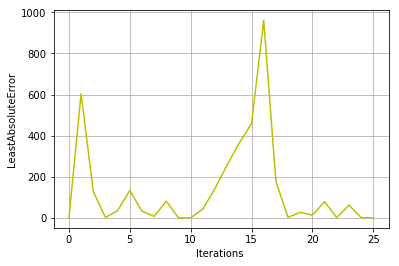

In [57]:
A.train(x)

In [58]:
W  = np.array(A.W ).reshape(15,5)

In [59]:
def plotter(k):
    
    plt.plot(W[k],'o--', label = k)
    plt.grid()
    plt.legend(loc = 8, bbox_to_anchor = (1.25,-0.075))    

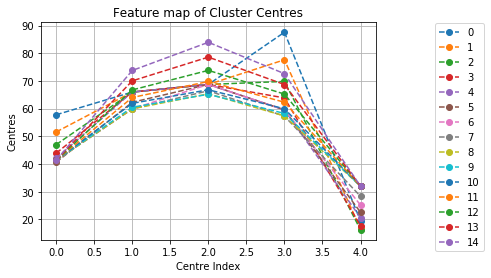

In [60]:
for k in range(15):
    plotter(k)
plt.xlabel('Centre Index')
plt.ylabel('Centres')
plt.title('Feature map of Cluster Centres')

### Please check the file 'data.csv' for tabulated information on cluster formation 